### 📊 **CDD-21: Visualização de Dados (Fundamentos)**

**Autora:** Tina Almeida

**Data:** 11/02/2026

**Datasets:** `gas_prices.csv`, `fifa19.csv`, `house.csv`

---
### 🎯 Objetivo
Criar visualização profissionais (Linhas, Barras e Histogramas) utilizando loops para automação e paletas de cores modernas.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# --- Configuração do estilo do gráfico ---
plt.style.use('seaborn-v0_8-darkgrid')

# Configurações tamanho padrão das figuras
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("🎨 Configurações de estilo do gráfico aplicadas com sucesso!")

🎨 Configurações de estilo do gráfico aplicadas com sucesso!


1️⃣ Importando os Dataset

In [30]:
# Lendo o arquivo CSV usando pandas

caminho_gas = '../dados/gas_prices/gas_prices.csv'
caminho_fifa19 = '../dados/fifa19/fifa19.csv'
caminho_house = '../dados/house/house.csv'
encoding = 'latin1'  # Especificando a codificação

print("--- Acessando os arquivos CSV para leitura ---")

print("\n📂 Verificando a existência dos arquivos CSV gas_prices...")
if os.path.exists(caminho_gas) :
    print(f"🟢 Caminho do arquivo gas_prices: {caminho_gas}")
    gas_prices = pd.read_csv(caminho_gas, encoding=encoding)
    print("📊 Dados Gas carregados com sucesso!")
else:
    print("❌ O arquivo CSV gas_prices não foi encontrado. Verifique os caminhos e tente novamente.")

print("\n📂 Verificando a existência dos arquivos CSV fifa19...")
if os.path.exists(caminho_fifa19) :
    print(f"🟢 Caminho do arquivo fifa19: {caminho_fifa19}")
    fifa19 = pd.read_csv(caminho_fifa19, encoding=encoding)
    print("📊 Dados FIFA19 carregados com sucesso!")
else:
    print("❌ O arquivo CSV fifa19 não foi encontrado. Verifique os caminhos e tente novamente.")

print("\n📂 Verificando a existência dos arquivos CSV house...")
if os.path.exists(caminho_house) :
    print(f"🟢 Caminho do arquivo house: {caminho_house}")
    house = pd.read_csv(caminho_house, encoding=encoding)
    print("📊 Dados House carregados com sucesso!")
else:
    print("❌ O arquivo CSV house não foi encontrado. Verifique os caminhos e tente novamente.")

--- Acessando os arquivos CSV para leitura ---

📂 Verificando a existência dos arquivos CSV gas_prices...
🟢 Caminho do arquivo gas_prices: ../dados/gas_prices/gas_prices.csv
📊 Dados Gas carregados com sucesso!

📂 Verificando a existência dos arquivos CSV fifa19...
🟢 Caminho do arquivo fifa19: ../dados/fifa19/fifa19.csv
📊 Dados FIFA19 carregados com sucesso!

📂 Verificando a existência dos arquivos CSV house...
🟢 Caminho do arquivo house: ../dados/house/house.csv
📊 Dados House carregados com sucesso!


2️⃣ Gráfico de Linhas (Evolução Gasolina) 📈

--- 📈 Evolução dos preços da gasolina ---


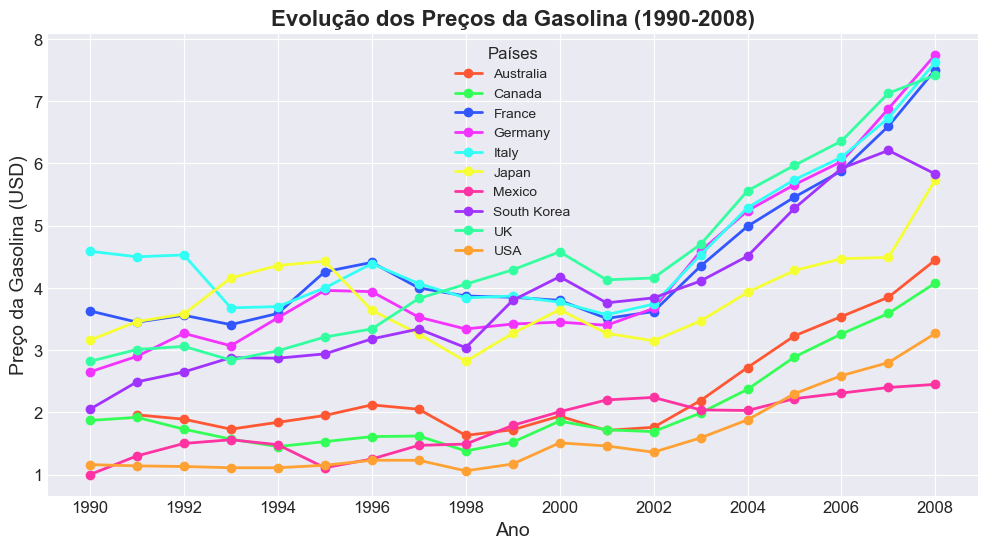

In [31]:
print("--- 📈 Evolução dos preços da gasolina ---")

# Lista de países que queremos comparar
paises = ['Australia','Canada','France','Germany','Italy','Japan','Mexico','South Korea','UK','USA']
# Cores para cada país ( Modernas e vibrantes )
cores = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#33FFF5', '#F5FF33', '#FF33A1', '#A133FF', '#33FFA1', '#FFA133']

plt.figure(figsize=(12, 6))

plt.title('Evolução dos Preços da Gasolina (1990-2008)', fontsize=16, fontweight='bold')

#---Loop para plotar os dados de cada país ---
# O zip permite iterar simultaneamente sobre as listas de países e cores
for pais, cor in zip(paises, cores):
    plt.plot(gas_prices['Year'], gas_prices[pais], marker='o', label=pais, color=cor, linewidth=2)  # Linha mais grossa e marcadores

# Configurações dos eixos
plt.xticks(gas_prices['Year'][::2])  # Mostrar apenas a cada 2 anos para evitar poluição visual
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço da Gasolina (USD)', fontsize=14)

plt.legend(title='Países', fontsize=10) # Legenda com título e fonte menor
plt.savefig('../graficos/gas_prices_evolution.png', dpi=300, bbox_inches='tight') # Salvando o gráfico com alta resolução
plt.show()

3️⃣ Gráfico de Barras (Fifa Top Clubes) 📊

--- 📊 Comparação de Clubes (FIFA19) ---


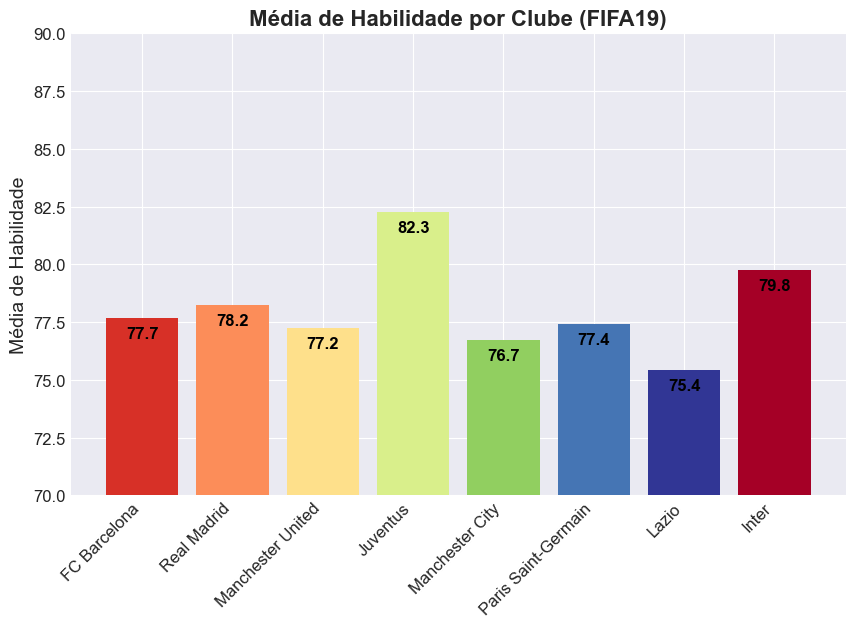

In [38]:
print("--- 📊 Comparação de Clubes (FIFA19) ---")

# Selecionando alguns clubes para comparação
clubes = ['FC Barcelona', 'Real Madrid', 'Manchester United', 'Juventus', 'Manchester City', 'Paris Saint-Germain', 'Lazio', 'Inter']

medias = []
# Loop para calcular a média de cada clube
for clube in clubes:
    media = fifa19[fifa19['Club'] == clube]['Overall'].mean()
    medias.append(media)

# Cores para os clubes (paleta 'coolwarm')
barras = plt.bar(clubes, medias, color=['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#4575b4', '#313695', '#a50026'])

plt.title('Média de Habilidade por Clube (FIFA19)', fontsize=16, fontweight='bold')
plt.ylabel('Média de Habilidade', fontsize=14)
plt.ylim(70, 90)  # Limitando o eixo y para melhor visualização
plt.xticks(rotation=45, ha='right')  # Rotacionando os nomes dos clubes para melhor leitura

# Adicionando valores no topo das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura - 1, f'{altura:.1f}',
             ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

plt.savefig('../graficos/fifa19_club_comparison.png', dpi=300, bbox_inches='tight') # Salvando o gráfico com alta resolução
plt.show()

4️⃣ Histograma (Distribuição de preços) 🏘️

--- 🏘️ Distribuição de Preços dos Imóveis ---


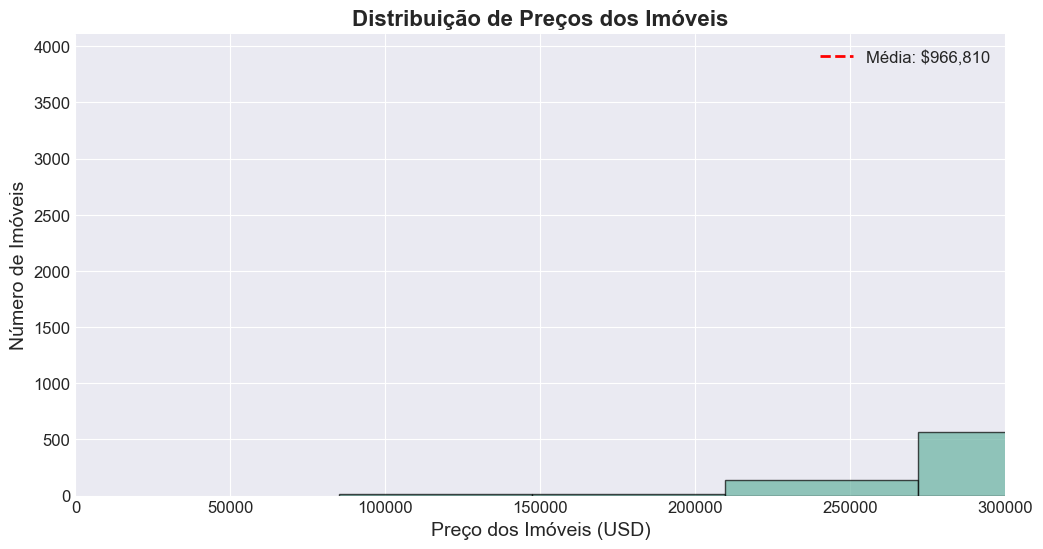

Nota: Removemos os outliers para melhor visualização, limitando o preço dos imóveis a $3,200,000.


In [42]:
print("--- 🏘️ Distribuição de Preços dos Imóveis ---")

# Removendo valores nulos na coluna 'Price'
house_limpo = house['Price'].dropna()

plt.figure(figsize=(12, 6))

# Calculando o valor onde estão 99%  das casas para limitar o eixo x e evitar distorção causada por outliers
limite_superior = house_limpo.quantile(0.99)
house_limpo = house_limpo[house_limpo <= limite_superior]

# bins = quantas barras queremos no histograma
# color = cor das barras, edgecolor = cor da borda das barras
plt.hist(house_limpo, bins=50, color='#69b3a2', edgecolor='black', alpha=0.7)

# Adicionando uma linha média para indicar o preço médio dos imóveis
media_preco = house_limpo.mean()
plt.axvline(media_preco, color='red', linestyle='dashed', linewidth=2, label=f'Média: ${media_preco:,.0f}')
plt.legend()

plt.title('Distribuição de Preços dos Imóveis', fontsize=16, fontweight='bold')
plt.xlabel('Preço dos Imóveis (USD)', fontsize=14)
plt.ylabel('Número de Imóveis', fontsize=14)

# Formatando o eixo x para não ficar em notação científica (1e6)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0, 300000)  # Limitando o eixo x para melhor visualização

plt.savefig('../graficos/house_price_distribution.png', dpi=300, bbox_inches='tight') # Salvando o gráfico com alta resolução
plt.show()

print(f"Nota: Removemos os outliers para melhor visualização, limitando o preço dos imóveis a ${limite_superior:,.0f}.")